#### CROP YIELD PREDICTION

Predicting yield  can helps us to get an estimate of the crop in a certain year to control the price rates.

The model to be built will focuses on predicting the crop yield in advance by analyzing factors like location, season, and crop type through machine learning techniques on previously collected datasets.

In [1]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
crop_data=pd.read_csv("C:/Users/USER/Desktop/Projects/Crop-Yield-Prediction/Data/data2/crop_production.csv")
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
#rows X columns
crop_data.shape

(246091, 7)

In [4]:
# dataset columns
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [5]:
# Get statistical inference of the dataset
crop_data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [6]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

There are missing values in the variable `Production`. We shall drop them.

In [7]:
# Dropping missing values 
crop_data = crop_data.dropna()

In [8]:
#checking if there still missing values
crop_data.isnull().values.any()

False

#### Adding a new column `Yield` which indicates `Production per unit Area`.

In [9]:
import warnings 
warnings.filterwarnings('ignore')
crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10) 

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0,4.225000


In [10]:
#check seasons type
crop_data.Season.value_counts()

Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64

In [11]:
#check crop planted
pd.set_option('display.max_rows', 500)
crop_data.Crop.value_counts()

Rice                         15082
Maize                        13787
Moong(Green Gram)            10106
Urad                          9710
Sesamum                       8821
Groundnut                     8770
Wheat                         7878
Sugarcane                     7827
Rapeseed &Mustard             7533
Arhar/Tur                     7476
Gram                          7227
Jowar                         6990
Onion                         6984
Potato                        6914
Dry chillies                  6421
Sunflower                     5483
Bajra                         5379
Small millets                 4593
Peas & beans (Pulses)         4447
Cotton(lint)                  4382
Linseed                       4351
Turmeric                      4168
Masoor                        4152
Sweet potato                  4122
Barley                        4116
Ragi                          4116
Horse-gram                    3823
Other Kharif pulses           3549
Coriander           

In [12]:
#District_Name
crop_data.District_Name.value_counts()

TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64

In [13]:
#Crop_Year
crop_data.Crop_Year.value_counts()

2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64

In [14]:
crop_data.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
Yield            float64
dtype: object

In [15]:
# Visualizing the float64 features 
cor_data = crop_data.loc[:,(crop_data.dtypes=='float64').values]
cor_data.head()

,Area,Production,Yield
0,1254.0,2000.0,1.594896
1,2.0,1.0,0.500000
2,102.0,321.0,3.147059
3,176.0,641.0,3.642045
4,720.0,165.0,0.229167


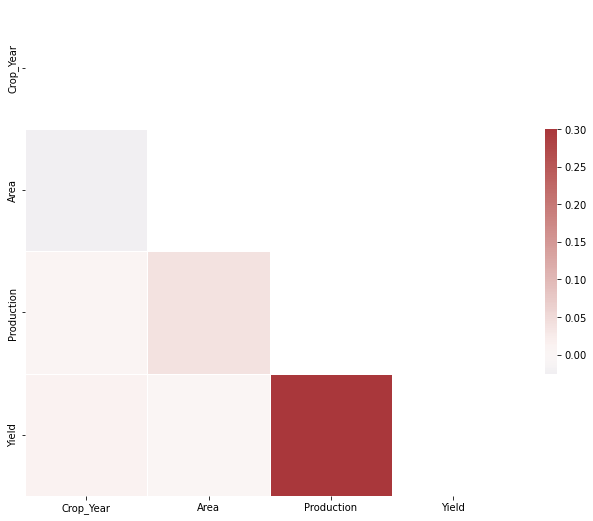

In [16]:
correlation_data=crop_data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [17]:
# Dropping unnecessary columns
data = crop_data.drop(['State_Name'], axis = 1)

In [18]:
dummy = pd.get_dummies(data)
dummy

,Crop_Year,Area,Production,Yield,District_Name_24 PARAGANAS NORTH,District_Name_24 PARAGANAS SOUTH,District_Name_ADILABAD,District_Name_AGAR MALWA,District_Name_AGRA,District_Name_AHMADABAD,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,1254.0,2000.0,1.594896,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,2.0,1.0,0.500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,102.0,321.0,3.147059,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,176.0,641.0,3.642045,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,720.0,165.0,0.229167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,2014,306.0,801.0,2.617647,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246087,2014,627.0,463.0,0.738437,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246088,2014,324.0,16250.0,50.154321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246089,2014,279151.0,597899.0,2.141848,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting dataset into train and test dataset

In [19]:
from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75% 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (181770, 778)
x_test : (60591, 778)
y_train : (181770,)
y_test : (60591,)


#### Build a Baseline Model: Linear Regression

In [20]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
# Predicting the test Results 

lr_predict = model.predict(x_test)
lr_predict

array([ -181489.171875 ,   489530.109375 , -1267951.8828125, ...,
         140833.75     , -1730617.9921875,   363764.015625 ])

In [22]:
model.score(x_test,y_test)

-12663.421745320156

In [23]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  -12663.421745320156


Text(0.5, 1.0, 'Linear Regression')

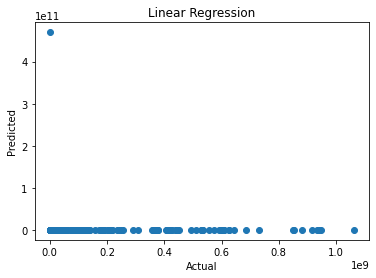

In [24]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Clearly, linear regression model is not good for training the dataset.

###### Assumptions of Linear Regression

1. Linearity.

2. Homoscedasticity

3. Multivariate normality

4. Lack of multicollinearity

#### Decision Tree

In [25]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [26]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([3900., 1100., 1756., ...,  248., 9656.,   22.])

In [27]:
regressor.score(x_test,y_test)

0.9585403357016204

In [28]:
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9585403357016204


In [29]:
# Calculating Adj. R2 score: 

Adjr2_2 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : -12828.153239298941


Text(0.5, 1.0, 'Decision Tree Regression')

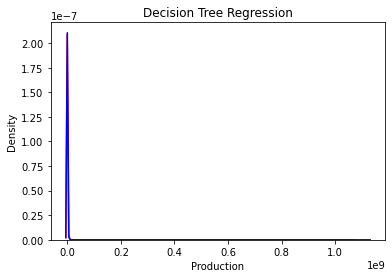

In [30]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

Decision Tree did not also give the desire results